In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime as dt
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
stock_symbols = ["BBRI.JK", "EMTK.JK", "HRUM.JK","ASSA.JK"]
end_date = dt.datetime.today()
start_date = dt.datetime(end_date.year - 5, end_date.month, end_date.day)  

In [3]:
df_stock = yf.download(stock_symbols, start=start_date, end=end_date)

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- ASSA.JK: No data found for this date range, symbol may be delisted


In [4]:
df_stock.head()

Adj Close                                       Close   
                      ASSA.JK      BBRI.JK    EMTK.JK     HRUM.JK ASSA.JK   
Date                                                                        
2018-06-05 00:00:00       NaN  2577.549072  890.47406  554.092163     NaN  \
2018-06-06 00:00:00       NaN  2610.700928  890.47406  541.248962     NaN   
2018-06-07 00:00:00       NaN  2710.156494  890.47406  546.753174     NaN   
2018-06-08 00:00:00       NaN  2602.412842  890.47406  546.753174     NaN   
2018-06-11 00:00:00       NaN  2602.412842  890.47406  546.753174     NaN   

                                               High          ...     Low   
                    BBRI.JK EMTK.JK HRUM.JK ASSA.JK BBRI.JK  ... EMTK.JK   
Date                                                         ...           
2018-06-05 00:00:00  3110.0   895.0   604.0     NaN  3160.0  ...   895.0  \
2018-06-06 00:00:00  3150.0   895.0   590.0     NaN  3160.0  ...   895.0   
2018-06-07 00:00:00  3270.0   895.0   596.0     NaN  3270.0  ...   895.0   
2018-06-08 00:00:00  3140.0   895.0   596.0     NaN  3250.0  ...   895.0   
2018-06-11 00:00:00  3140.0   895.0   596.0     NaN  3140.0  ...   895.0   

                               Open                          Volume   
                    HRUM.JK ASSA.JK BBRI.JK EMTK.JK HRUM.JK ASSA.JK   
Date                                                                  
2018-06-05 00:00:00   604.0     NaN  3150.0   895.0   606.0     NaN  \
2018-06-06 00:00:00   586.0     NaN  3120.0   895.0   606.0     NaN   
2018-06-07 00:00:00   590.0     NaN  3180.0   895.0   590.0     NaN   
2018-06-08 00:00:00   594.0     NaN  3210.0   895.0   602.0     NaN   
2018-06-11 00:00:00   596.0     NaN  3140.0   895.0   596.0     NaN   

                                                    
                         BBRI.JK EMTK.JK   HRUM.JK  
Date                                                
2018-06-05 00:00:00  135979600.0    2000  32423000  
2018-06-06 00:00:00   99509500.0    2000  17350000  
2018-06-07 00:00:00  183746200.0    2000  12983000  
2018-06-08 00:00:00  262972300.0    2000  15341000  
2018-06-11 00:00:00          0.0       0         0  

[5 rows x 24 columns]

In [5]:
df_stock.tail()

Adj Close                           Close                   
                      ASSA.JK BBRI.JK EMTK.JK HRUM.JK ASSA.JK BBRI.JK EMTK.JK   
Date                                                                            
2023-05-26 00:00:00       NaN  5600.0   595.0  1260.0     NaN  5600.0   595.0  \
2023-05-29 00:00:00       NaN  5550.0   585.0  1305.0     NaN  5550.0   585.0   
2023-05-30 00:00:00       NaN  5500.0   610.0  1360.0     NaN  5500.0   610.0   
2023-05-31 00:00:00       NaN  5575.0   595.0  1410.0     NaN  5575.0   595.0   
2023-06-05 00:00:00       NaN  5450.0   605.0  1415.0     NaN  5450.0   605.0   

                               High          ...     Low            Open   
                    HRUM.JK ASSA.JK BBRI.JK  ... EMTK.JK HRUM.JK ASSA.JK   
Date                                         ...                           
2023-05-26 00:00:00  1260.0     NaN  5600.0  ...   590.0  1260.0     NaN  \
2023-05-29 00:00:00  1305.0     NaN  5625.0  ...   565.0  1205.0     NaN   
2023-05-30 00:00:00  1360.0     NaN  5600.0  ...   585.0  1315.0     NaN   
2023-05-31 00:00:00  1410.0     NaN  5575.0  ...   590.0  1340.0     NaN   
2023-06-05 00:00:00  1415.0     NaN  5600.0  ...   590.0  1375.0     NaN   

                                             Volume                          
                    BBRI.JK EMTK.JK HRUM.JK ASSA.JK      BBRI.JK   EMTK.JK   
Date                                                                         
2023-05-26 00:00:00  5425.0   625.0  1280.0     NaN  154003100.0  25569700  \
2023-05-29 00:00:00  5600.0   595.0  1265.0     NaN  125049100.0  36776300   
2023-05-30 00:00:00  5500.0   585.0  1315.0     NaN   67363200.0  30926100   
2023-05-31 00:00:00  5575.0   615.0  1365.0     NaN  898453700.0  16569300   
2023-06-05 00:00:00  5600.0   605.0  1420.0     NaN  172733300.0   9474900   

                               
                      HRUM.JK  
Date                           
2023-05-26 00:00:00   4867400  
2023-05-29 00:00:00  25541700  
2023-05-30 00:00:00  24725100  
2023-05-31 00:00:00  23820600  
2023-06-05 00:00:00  12056900  

[5 rows x 24 columns]

In [6]:
df_stock.describe()

Adj Close                                          Close                
        ASSA.JK      BBRI.JK      EMTK.JK      HRUM.JK ASSA.JK      BBRI.JK   
count       0.0  1240.000000  1241.000000  1241.000000     0.0  1240.000000  \
mean        NaN  3601.271283  1244.785811   886.618724     NaN  4034.674361   
std         NaN   673.291035   677.720942   676.095638     NaN   617.808875   
min         NaN  1922.021973   405.843750   203.742157     NaN  2170.000000   
25%         NaN  3124.553467   727.926086   262.223694     NaN  3660.000000   
50%         NaN  3665.657471   887.471558   541.248962     NaN  4180.000000   
75%         NaN  4058.438660  1869.673218  1541.688721     NaN  4470.000000   
max         NaN  5600.000000  2991.477295  2675.518311     NaN  5600.000000   

                                   High               ...          Low   
           EMTK.JK      HRUM.JK ASSA.JK      BBRI.JK  ...      EMTK.JK   
count  1241.000000  1241.000000     0.0  1240.000000  ...  1241.000000  \
mean   1247.912571   928.437550     NaN  4082.518565  ...  1224.935133   
std     679.636358   700.347936     NaN   613.781482  ...   661.404767   
min     407.000000   216.000000     NaN  2270.000000  ...   397.000000   
25%     730.000000   281.000000     NaN  3680.000000  ...   725.000000   
50%     890.000000   580.000000     NaN  4215.000000  ...   885.000000   
75%    1875.000000  1600.000000     NaN  4520.000000  ...  1840.000000   
max    3000.000000  2815.000000     NaN  5625.000000  ...  2960.000000   

                      Open                                         Volume   
           HRUM.JK ASSA.JK      BBRI.JK      EMTK.JK      HRUM.JK ASSA.JK   
count  1241.000000     0.0  1240.000000  1241.000000  1241.000000     0.0  \
mean    909.050766     NaN  4039.522601  1248.945608   930.891217     NaN   
std     683.861839     NaN   618.445438   683.041887   703.560816     NaN   
min     213.000000     NaN  2250.000000   397.000000   216.000000     NaN   
25%     278.000000     NaN  3657.500000   727.500000   282.000000     NaN   
50%     570.000000     NaN  4180.000000   890.000000   586.000000     NaN   
75%    1575.000000     NaN  4480.000000  1885.000000  1605.000000     NaN   
max    2735.000000     NaN  5600.000000  3040.000000  2860.000000     NaN   

                                                 
            BBRI.JK       EMTK.JK       HRUM.JK  
count  1.240000e+03  1.241000e+03  1.241000e+03  
mean   1.486041e+08  2.063079e+07  3.256729e+07  
std    9.569479e+07  4.050526e+07  3.956155e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    8.998202e+07  1.000000e+04  6.693000e+06  
50%    1.262206e+08  2.235000e+06  1.592950e+07  
75%    1.782866e+08  2.799680e+07  4.452300e+07  
max    8.984537e+08  9.250834e+08  3.190125e+08  

[8 rows x 24 columns]

In [7]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 2018-06-05 00:00:00 to 2023-06-05 00:00:00
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, ASSA.JK)  0 non-null      float64
 1   (Adj Close, BBRI.JK)  1240 non-null   float64
 2   (Adj Close, EMTK.JK)  1241 non-null   float64
 3   (Adj Close, HRUM.JK)  1241 non-null   float64
 4   (Close, ASSA.JK)      0 non-null      float64
 5   (Close, BBRI.JK)      1240 non-null   float64
 6   (Close, EMTK.JK)      1241 non-null   float64
 7   (Close, HRUM.JK)      1241 non-null   float64
 8   (High, ASSA.JK)       0 non-null      float64
 9   (High, BBRI.JK)       1240 non-null   float64
 10  (High, EMTK.JK)       1241 non-null   float64
 11  (High, HRUM.JK)       1241 non-null   float64
 12  (Low, ASSA.JK)        0 non-null      float64
 13  (Low, BBRI.JK)        1240 non-null   float64
 14  (Low, EMTK.JK)        1241 non-null   float6

In [8]:
df_assa = yf.download('ASSA.JK', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASSA.JK: No data found for this date range, symbol may be delisted


In [9]:
df_assa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


<Axes: xlabel='Date'>

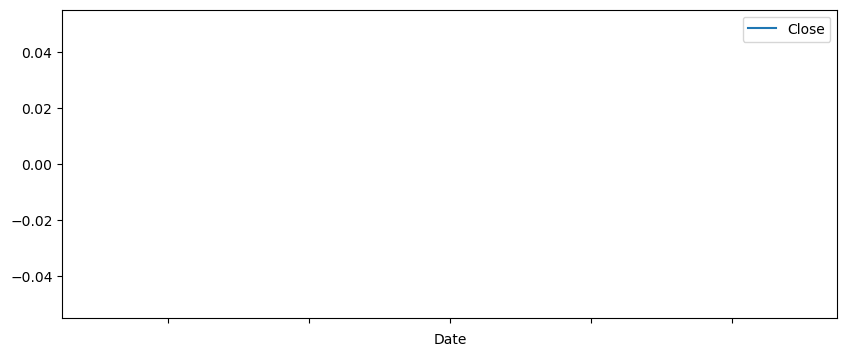

In [10]:
df_assa['Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

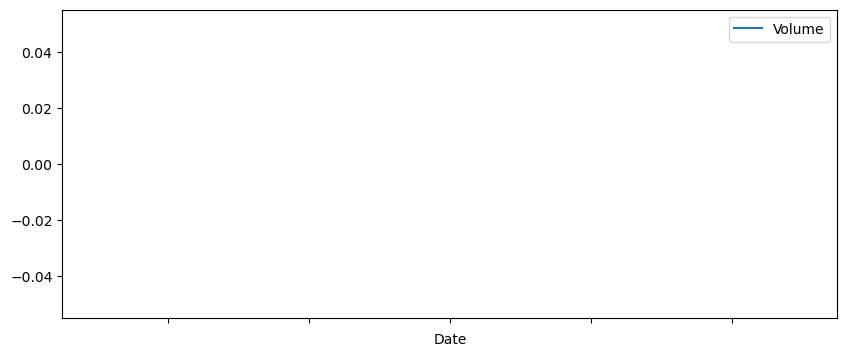

In [11]:
df_assa['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
ma_days = [50,100,200]

for ma in ma_days:
    column_names = "MA for %s days" %(str(ma))
    df_assa[column_names] = df_assa['Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

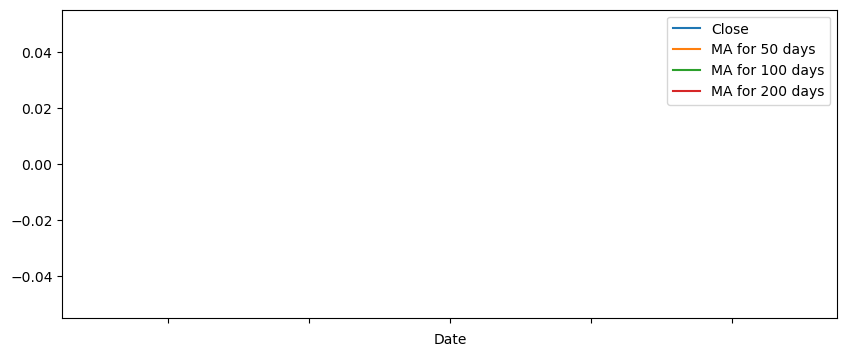

In [13]:
df_assa[['Close','MA for 50 days','MA for 100 days','MA for 200 days']].plot(figsize=(10,4))

In [14]:
df_assa.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 100 days,MA for 200 days
Date,,,,,,,,,


In [15]:
df_assa['Daily Return'] = df_assa['Close'].pct_change()
df_assa.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 50 days,MA for 100 days,MA for 200 days,Daily Return
Date,,,,,,,,,,


<Axes: xlabel='Date'>

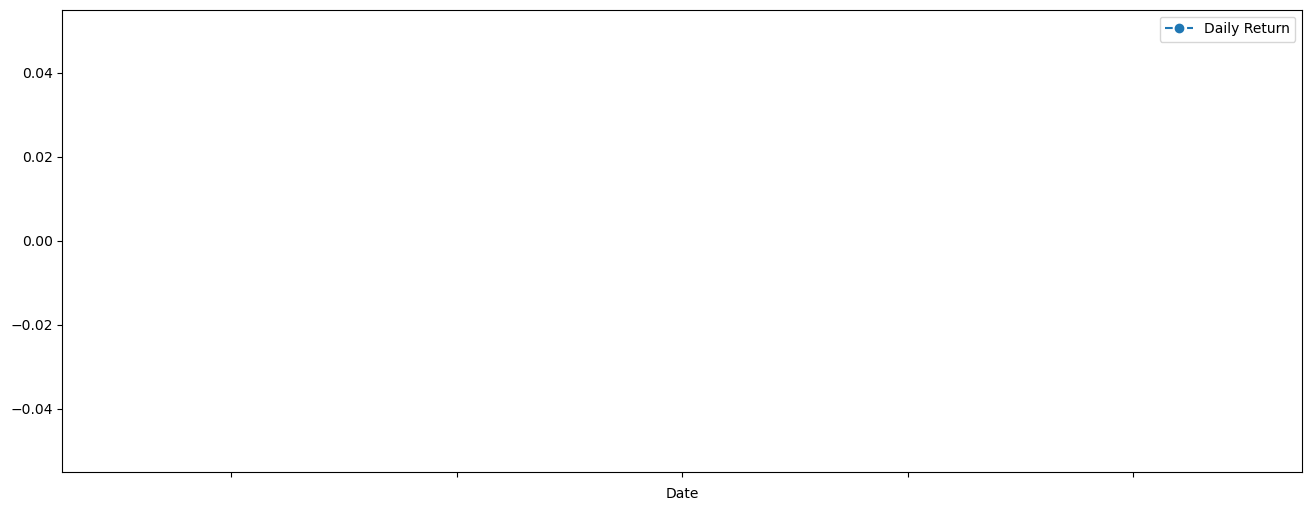

In [16]:
df_assa['Daily Return'].dropna().plot(legend=True,figsize=(16,6),marker='o',linestyle='--')

<Axes: >

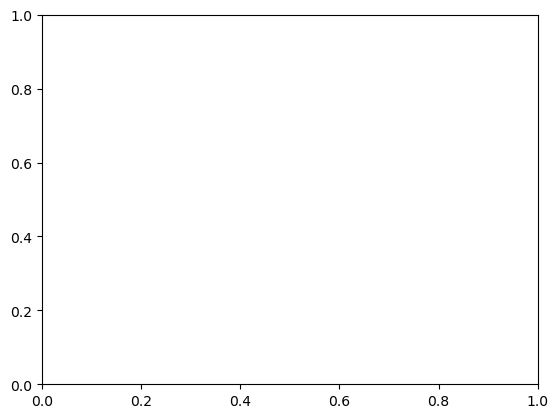

In [17]:
sns.histplot(data=df_assa['Daily Return'].dropna(),kde=True,color='purple',bins=50)

In [18]:
df_stock['Close'].head()

,ASSA.JK,BBRI.JK,EMTK.JK,HRUM.JK
Date,,,,
2018-06-05 00:00:00,NaN,3110.0,895.0,604.0
2018-06-06 00:00:00,NaN,3150.0,895.0,590.0
2018-06-07 00:00:00,NaN,3270.0,895.0,596.0
2018-06-08 00:00:00,NaN,3140.0,895.0,596.0
2018-06-11 00:00:00,NaN,3140.0,895.0,596.0


In [19]:
df_stock_close = df_stock['Close']
df_stock_close.head()

,ASSA.JK,BBRI.JK,EMTK.JK,HRUM.JK
Date,,,,
2018-06-05 00:00:00,NaN,3110.0,895.0,604.0
2018-06-06 00:00:00,NaN,3150.0,895.0,590.0
2018-06-07 00:00:00,NaN,3270.0,895.0,596.0
2018-06-08 00:00:00,NaN,3140.0,895.0,596.0
2018-06-11 00:00:00,NaN,3140.0,895.0,596.0


In [20]:
pect_change = df_stock_close.pct_change()
pect_change

,ASSA.JK,BBRI.JK,EMTK.JK,HRUM.JK
Date,,,,
2018-06-05,NaN,NaN,NaN,NaN
2018-06-06,NaN,0.012862,0.000000,-0.023179
2018-06-07,NaN,0.038095,0.000000,0.010169
2018-06-08,NaN,-0.039755,0.000000,0.000000
2018-06-11,NaN,0.000000,0.000000,0.000000
...,...,...,...,...
2023-05-26,NaN,0.022831,-0.040323,-0.015625
2023-05-29,NaN,-0.008929,-0.016807,0.035714
2023-05-30,NaN,-0.009009,0.042735,0.042146


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

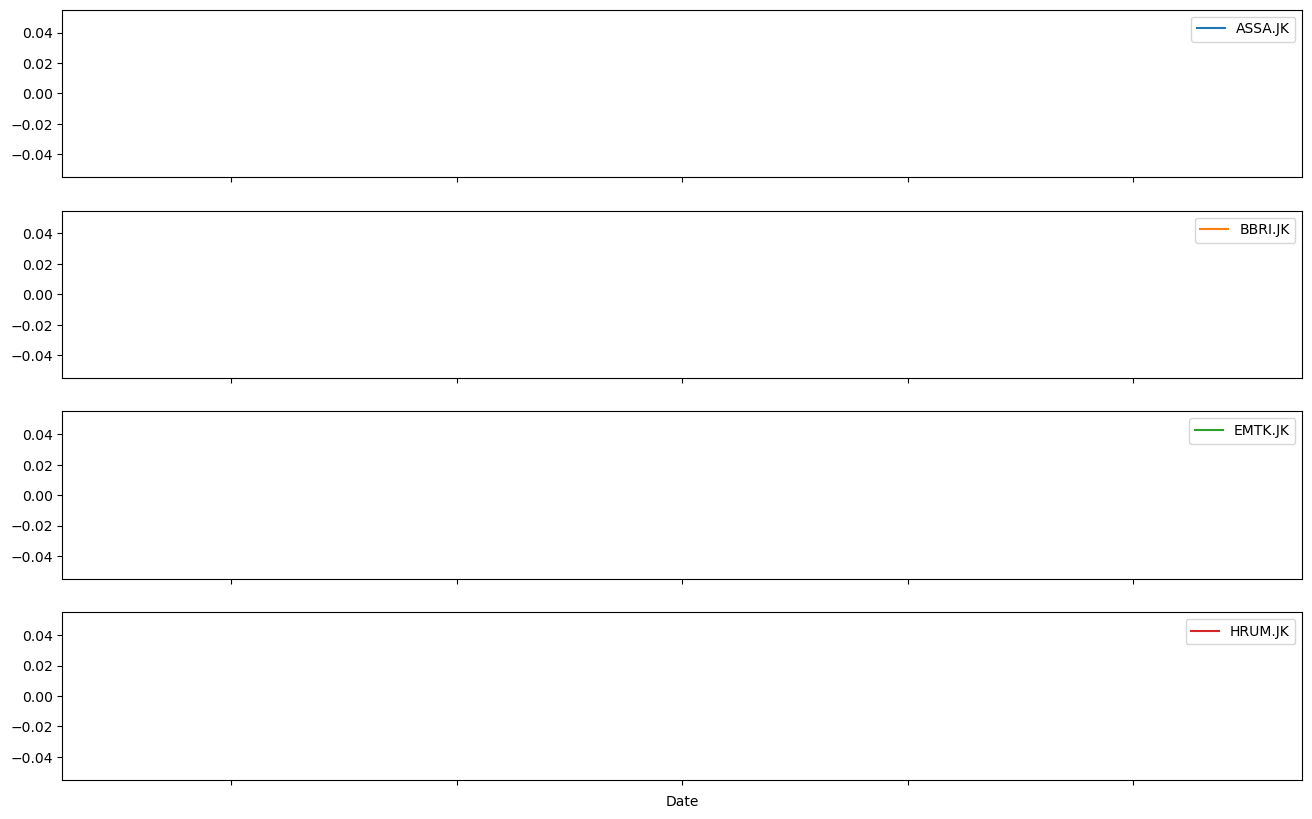

In [21]:
pect_change.dropna().plot(subplots=True,legend=True,figsize=(16,10))

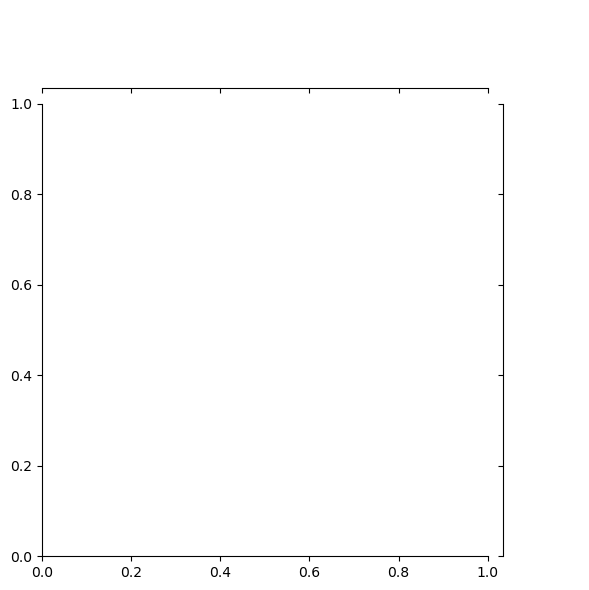

In [22]:
sns.jointplot(data=df_stock_close,x='ASSA.JK',y='ASSA.JK', kind='scatter',color='green')

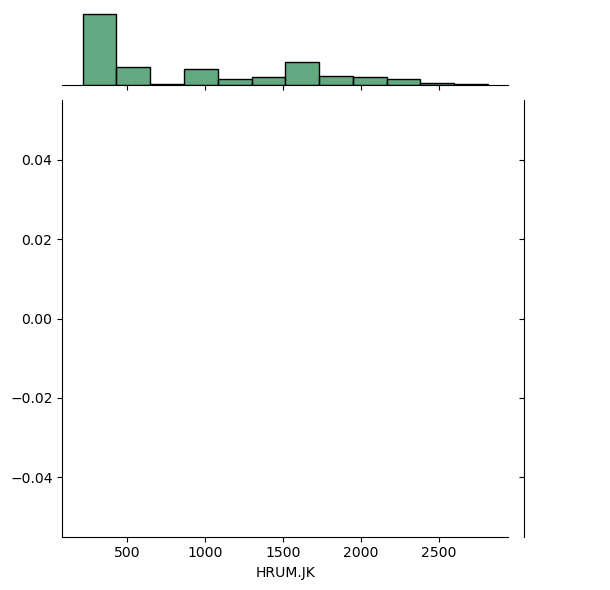

In [23]:
sns.jointplot(data=df_stock_close,x='HRUM.JK',y='ASSA.JK',kind='scatter',color='seagreen')

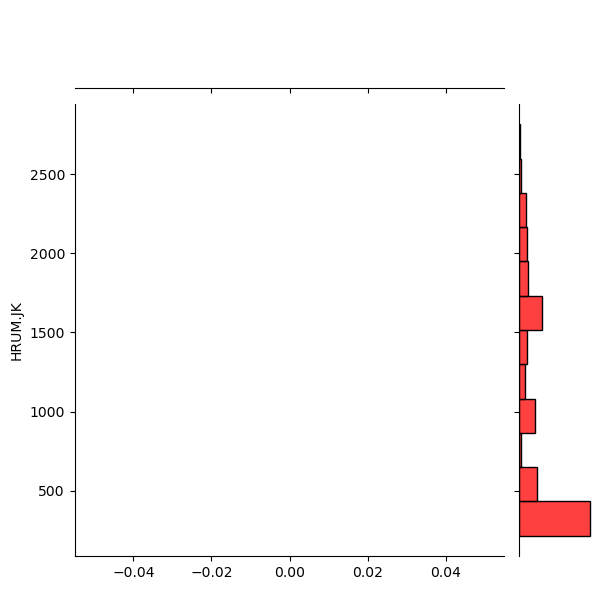

In [24]:
sns.jointplot(data=df_stock_close,x='ASSA.JK',y='HRUM.JK',kind='scatter',color='red')

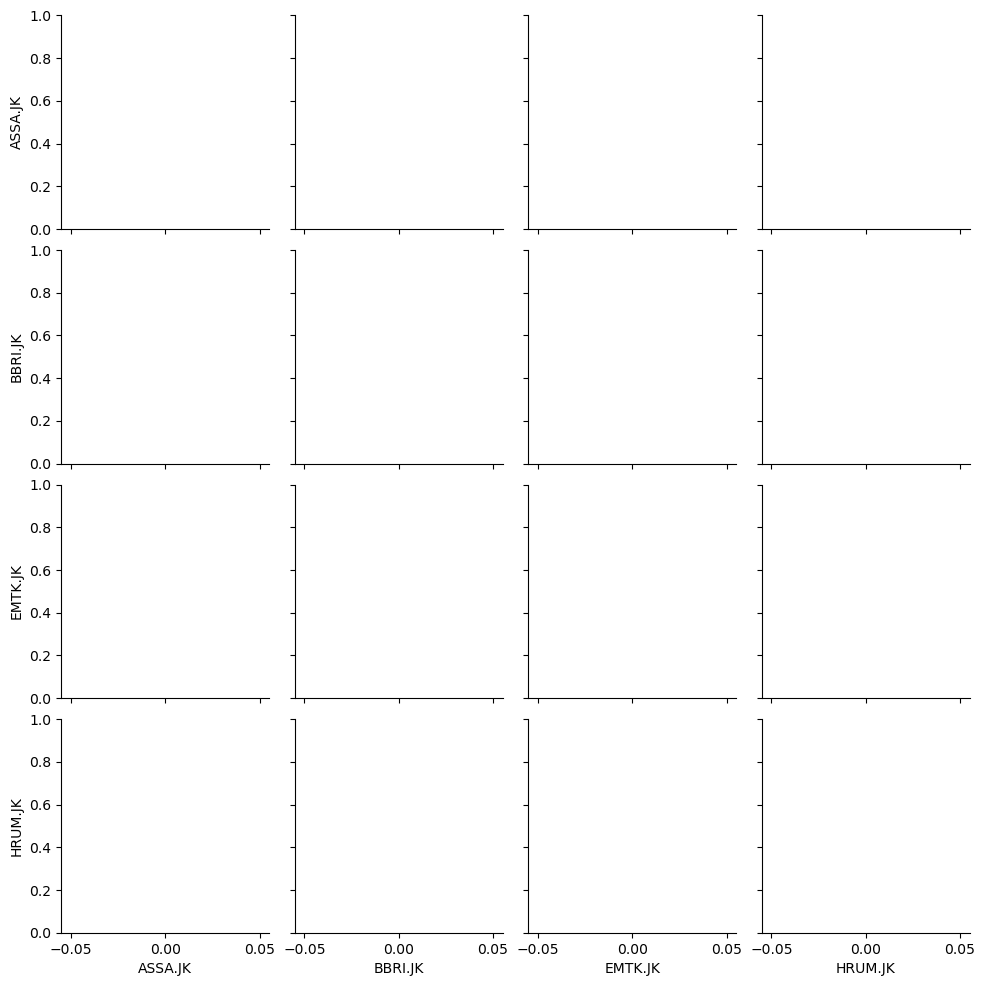

In [25]:
sns.pairplot(df_stock_close.dropna())

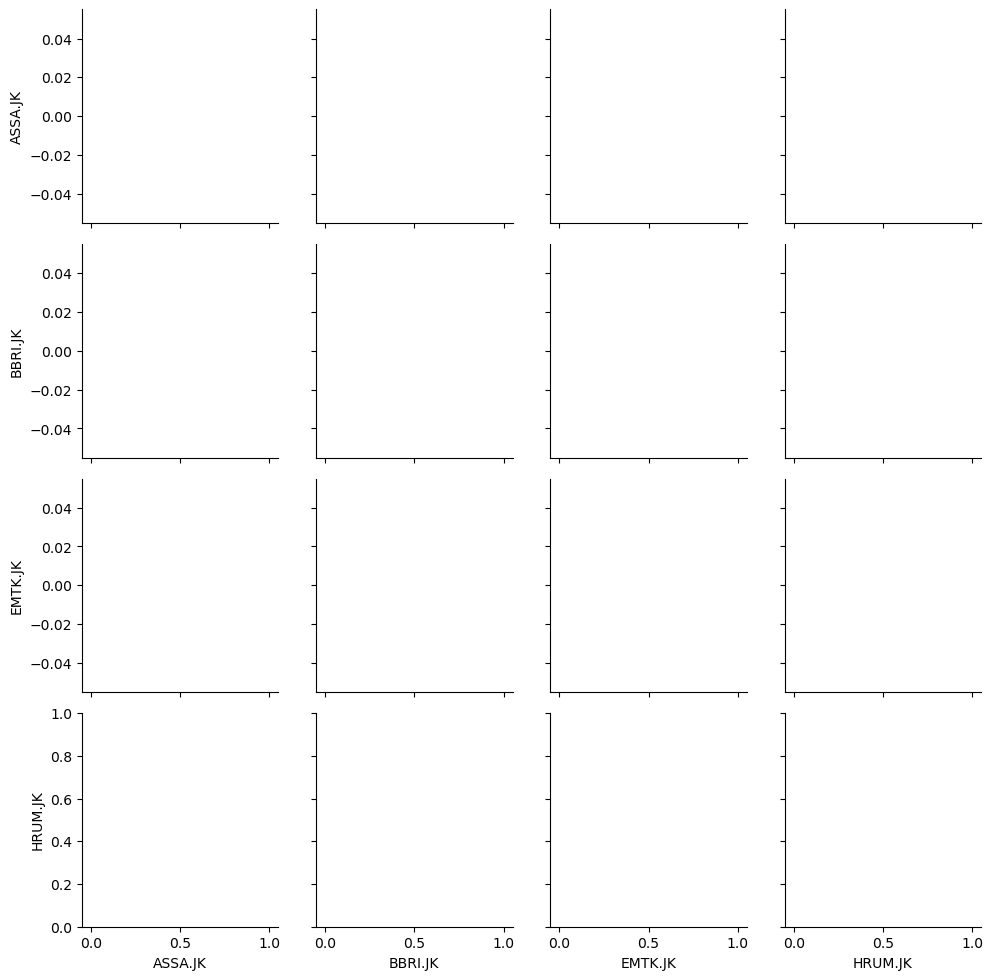

In [26]:
return_fig = sns.PairGrid(df_stock_close.dropna())
return_fig.map_upper(plt.scatter,color='green')
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist,bins=50)

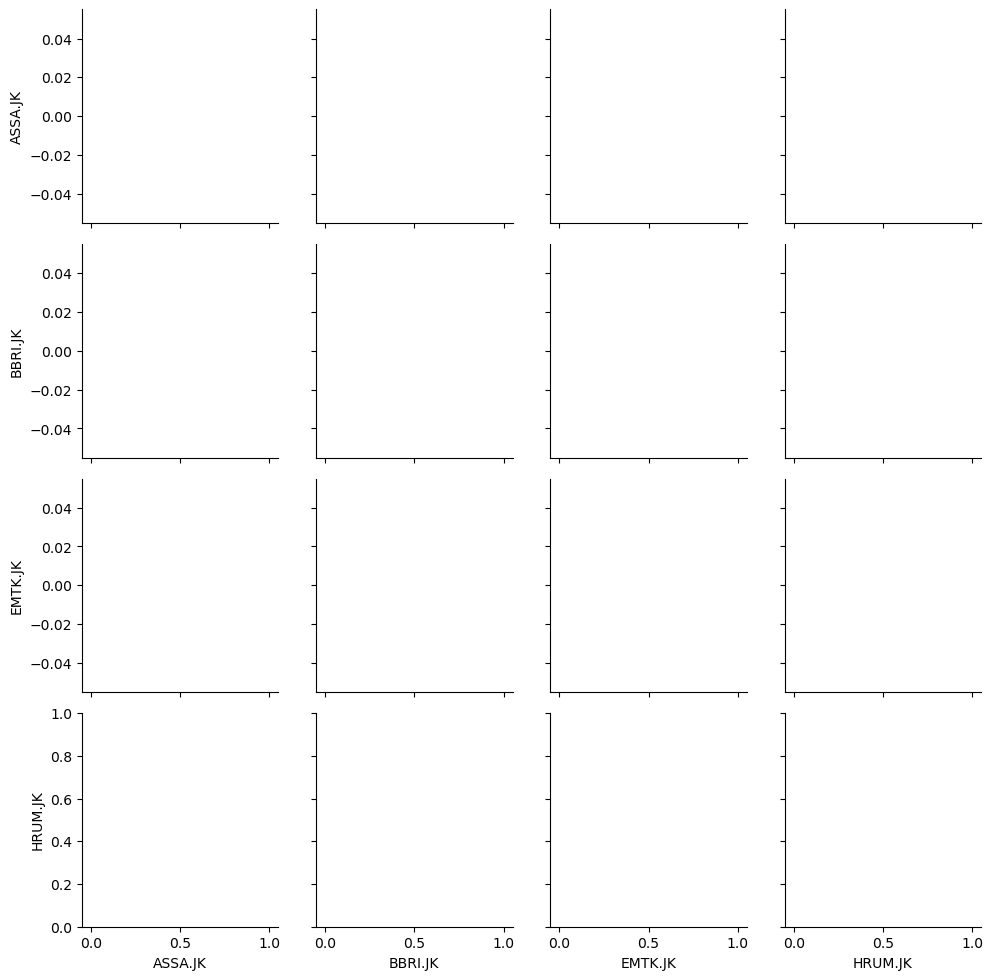

In [27]:
return_fig = sns.PairGrid(pect_change.dropna())
return_fig.map_upper(plt.scatter,color='green')
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist,bins=50)

<Axes: >

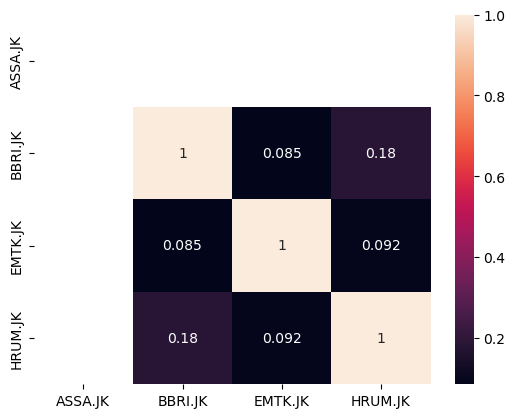

In [28]:
sns.heatmap(pect_change.corr(),annot=True)

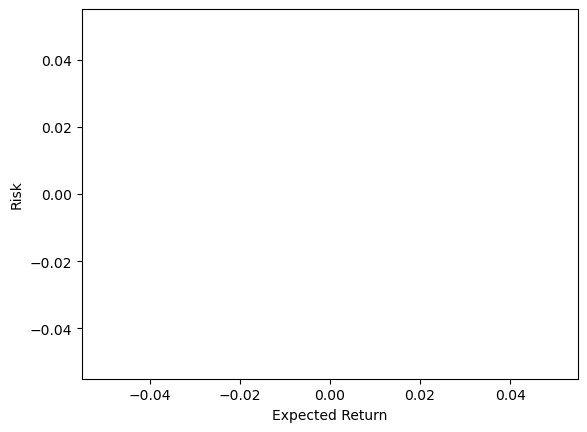

In [29]:
pect = pect_change.dropna()

area = np.pi*30

plt.scatter(pect.mean(), pect.std(),alpha=0.5,s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(pect.columns, pect.mean(), pect.std()):
    plt.annotate(label, xy = (x,y), xytext=(50,50), textcoords='offset points', ha='right', va='bottom', 
                arrowprops = dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

In [30]:
pect['EMTK.JK'].quantile(0.01)

nan

In [31]:
pect['BBRI.JK'].quantile(0.01)

nan

In [32]:
pect['HRUM.JK'].quantile(0.01)

nan

In [33]:
pect['ASSA.JK'].quantile(0.01)

nan

In [34]:
days = 365
dt = 1/days
mu = pect.mean()['ASSA.JK']
sigma = pect.std()['ASSA.JK']

In [35]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in range(1,days):
        drift[x] = mu * dt
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma * np.sqrt(dt))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'Monte Carlo Method for ASSA')

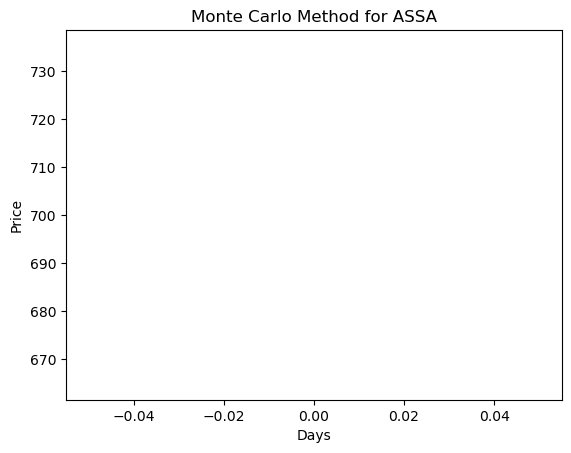

In [36]:
start_price = 700

for x in range(1000):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Method for ASSA')

In [37]:
runs = 10000

simulations = np.zeros(runs)

for x in range(runs):
    simulations[x] = stock_monte_carlo(start_price,days,mu,sigma)[days - 1]

C:\Users\asus\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\asus\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

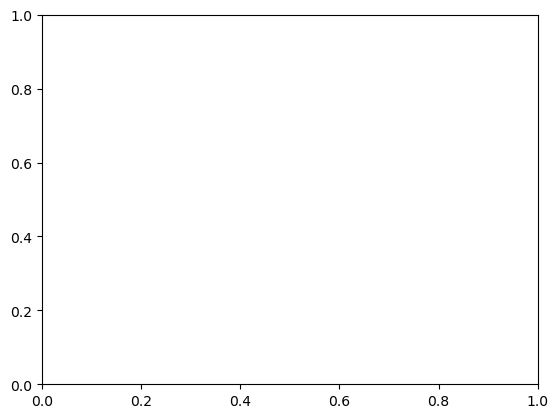

In [38]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start Price: Rp.%.2f" %start_price)
plt.figtext(0.6,0.7,s="Mean Final Price: Rp.%.2f" %simulations.mean())
plt.figtext(0.6,0.6,s="VaR (0.99): Rp.%.2f" %(start_price - q))
plt.figtext(0.15,0.6,s="q(0.99): Rp.%.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title("Final price distribution for ASSA Stock after %s days" %days, weight='bold')

In [ ]:
df_assa.tail()

In [ ]:
mu_hrum = pect.mean()['HRUM.JK']
sigma_hrum = pect.std()['HRUM.JK']

In [ ]:
def stock_monte_carlo_hrum(start_price_hrum,days,mu_hrum,sigma_hrum):
    price = np.zeros(days)
    price[0] = start_price_hrum
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in range(1,days):
        drift[x] = mu_hrum * dt
        shock[x] = np.random.normal(loc=mu_hrum*dt, scale=sigma_hrum * np.sqrt(dt))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [ ]:
start_price_hrum = 2070

for x in range(1000):
    plt.plot(stock_monte_carlo_hrum(start_price_hrum,days,mu_hrum,sigma_hrum))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Method for HRUM')

In [ ]:
simulations_hrum = np.zeros(runs)

for x in range(runs):
    simulations_hrum[x] = stock_monte_carlo_hrum(start_price_hrum,days,mu_hrum,sigma_hrum)[days - 1]

In [ ]:
q_hrum = np.percentile(simulations_hrum,0.01)

plt.hist(simulations_hrum,bins=100)

plt.figtext(0.6,0.8,s="Start Price: Rp.%.2f" %start_price_hrum)
plt.figtext(0.6,0.7,s="Mean Final Price: Rp.%.2f" %simulations_hrum.mean())
plt.figtext(0.6,0.6,s="VaR (0.99): Rp.%.2f" %(start_price_hrum - q_hrum))
plt.figtext(0.15,0.6,s="q(0.99): Rp.%.2f" %q_hrum)
plt.axvline(x=q_hrum,linewidth=4,color='r')
plt.title("Final price distribution for HRUM Stock after %s days" %days, weight='bold')

In [ ]:
df_stock

In [ ]:
mu_bbri = pect.mean()['BBRI.JK']
sigma_bbri = pect.std()['BBRI.JK']

In [ ]:
def stock_monte_carlo_bbri(start_price_bbri,days,mu_bbri,sigma_bbri):
    price = np.zeros(days)
    price[0] = start_price_bbri
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in range(1,days):
        drift[x] = mu_bbri * dt
        shock[x] = np.random.normal(loc=mu_bbri*dt, scale=sigma_bbri * np.sqrt(dt))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [ ]:
start_price_bbri = 5250

for x in range(1000):
    plt.plot(stock_monte_carlo_bbri(start_price_bbri,days,mu_bbri,sigma_bbri))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Method for BBRI')

In [ ]:
simulations_bbri = np.zeros(runs)

for x in range(runs):
    simulations_bbri[x] = stock_monte_carlo_bbri(start_price_bbri,days,mu_bbri,sigma_bbri)[days - 1]

In [ ]:
q_bbri = np.percentile(simulations_bbri,1)

plt.hist(simulations_bbri,bins=100)

plt.figtext(0.6,0.8,s="Start Price: Rp.%.2f" %start_price_bbri)
plt.figtext(0.6,0.7,s="Mean Final Price: Rp.%.2f" %simulations_bbri.mean())
plt.figtext(0.6,0.6,s="VaR (0.99): Rp.%.2f" %(start_price_bbri - q_bbri))
plt.figtext(0.15,0.6,s="q(0.99): Rp.%.2f" %q_bbri)
plt.axvline(x=q_bbri,linewidth=4,color='r')
plt.title("Final price distribution for BBRI Stock after %s days" %days, weight='bold')

In [ ]:
mu_emtk = pect.mean()['EMTK.JK']
sigma_emtk = pect.std()['EMTK.JK']

In [ ]:
def stock_monte_carlo_emtk(start_price_emtk,days,mu_emtk,sigma_emtk):
    price = np.zeros(days)
    price[0] = start_price_emtk
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in range(1,days):
        drift[x] = mu_emtk * dt
        shock[x] = np.random.normal(loc=mu_emtk*dt, scale=sigma_emtk * np.sqrt(dt))
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [ ]:
start_price_emtk = 655

for x in range(1000):
    plt.plot(stock_monte_carlo_emtk(start_price_emtk,days,mu_emtk,sigma_emtk))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Method for EMTK')

In [ ]:
simulations_emtk = np.zeros(runs)

for x in range(runs):
    simulations_emtk[x] = stock_monte_carlo_emtk(start_price_emtk,days,mu_emtk,sigma_emtk)[days - 1]

In [ ]:
q_emtk = np.percentile(simulations_emtk,1)

plt.hist(simulations_emtk,bins=100)

plt.figtext(0.6,0.8,s="Start Price: Rp.%.2f" %start_price_emtk)
plt.figtext(0.6,0.7,s="Mean Final Price: Rp.%.2f" %simulations_emtk.mean())
plt.figtext(0.6,0.6,s="VaR (0.99): Rp.%.2f" %(start_price_emtk - q_emtk))
plt.figtext(0.15,0.6,s="q(0.99): Rp.%.2f" %q_emtk)
plt.axvline(x=q_emtk,linewidth=4,color='r')
plt.title("Final price distribution for BBRI Stock after %s days" %days, weight='bold')

In [ ]:
df_stock.head()

In [ ]:
df_stock[[('Close','ASSA.JK'),('Open','BBRI.JK')]]

In [ ]:
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}
df = pd.DataFrame(data)
df.columns = [['Group1', 'Group1', 'Group2'], ['Column1', 'Column2', 'Column3']]

In [ ]:
df

In [ ]:
selected_column = df['Group1', 'Column2']
selected_column